In [123]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [124]:
from src.keras.model import GAN

In [14]:
#%load_ext autoreload
%autoreload 2

In [72]:
def plot_mnist_data(images):
    for i in range(len(images)):  
        plt.subplot(330 + 1 + i)
        plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.show()

## Model

In [138]:
gan_model = GAN()

Hello 1


In [139]:
gan_model.compile(
    d_optimizer=Adam(learning_rate=3e-4),
    g_optimizer=Adam(learning_rate=3e-4),
    loss_fn=BinaryCrossentropy(),
)

In [128]:
noise = gan_model.sample_random_noise(9)

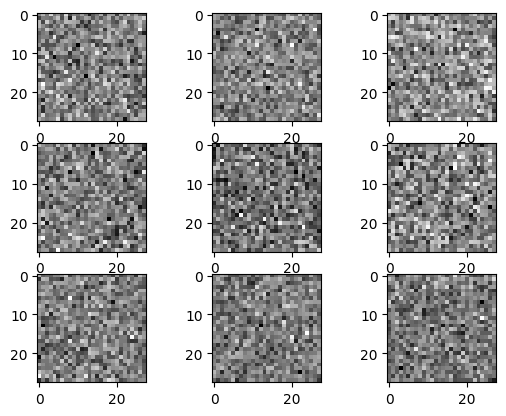

In [129]:
image_noise = noise.numpy().reshape(9, 28, 28)
image_noise = image_noise + 255
plot_mnist_data(image_noise)

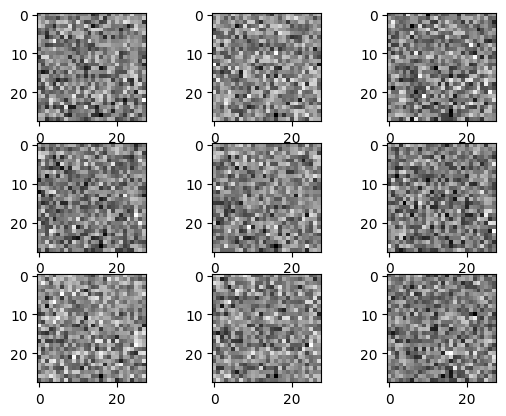

In [130]:
gan_g_output = gan_model.generator(noise)
gan_g_output = gan_g_output.numpy().reshape(9, 28, 28)
plot_mnist_data(gan_g_output + 255)

In [131]:
gan_model.discriminator(gan_g_output.reshape(-1, 28*28))

<tf.Tensor: shape=(9, 1), dtype=float32, numpy=
array([[0.3208773 ],
       [0.3336704 ],
       [0.32433078],
       [0.33371976],
       [0.30196396],
       [0.33172274],
       [0.344198  ],
       [0.33813146],
       [0.31931394]], dtype=float32)>

## Prep Data

In [132]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

print(f"MNIST Train Set: {x_train.shape}")
print(f"MNIST Test Set: {x_test.shape}")

MNIST Train Set: (60000, 28, 28)
MNIST Test Set: (10000, 28, 28)


In [134]:
# combine train / test data
batch_size = 64
all_digits = np.concatenate([x_train, x_test])
all_labels = np.concatenate([y_train, y_test])

In [135]:
all_digits = all_digits.astype("float32") / 255.0  
all_digits = np.reshape(all_digits, (-1, 28*28))

dataset = tf.data.Dataset.from_tensor_slices(all_digits)
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

In [140]:
all_digits.shape

(70000, 784)

## Train GAN

In [151]:
gan_model = GAN()
gan_model.compile(
    d_optimizer=Adam(learning_rate=3e-4),
    g_optimizer=Adam(learning_rate=3e-4),
    loss_fn=BinaryCrossentropy(),
)

Hello 1


In [152]:
gan_model.fit(dataset, epochs=20, batch_size=64)

Epoch 1/20
1094/1094 [==============================] - 7s 6ms/step - d_loss: 0.0081 - g_loss: 8.3026
Epoch 2/20
1094/1094 [==============================] - 6s 6ms/step - d_loss: 4.3741e-04 - g_loss: 10.2200
Epoch 3/20
1094/1094 [==============================] - 7s 6ms/step - d_loss: 1.7136e-04 - g_loss: 11.9434
Epoch 4/20
1094/1094 [==============================] - 7s 6ms/step - d_loss: 1.0083e-04 - g_loss: 12.5945
Epoch 5/20
1094/1094 [==============================] - 7s 6ms/step - d_loss: 3.7008e-04 - g_loss: 14.1944
Epoch 6/20
1094/1094 [==============================] - 7s 6ms/step - d_loss: 1.3043e-04 - g_loss: 12.0116
Epoch 7/20
1094/1094 [==============================] - 7s 6ms/step - d_loss: 5.3532e-05 - g_loss: 12.9906
Epoch 8/20
1094/1094 [==============================] - 7s 6ms/step - d_loss: 1.4897e-04 - g_loss: 14.6194
Epoch 9/20
1094/1094 [==============================] - 7s 6ms/step - d_loss: 1.9437e-06 - g_loss: 13.3313
Epoch 10/20
1094/1094 [===================

### Test model

In [153]:
noise = gan_model.sample_random_noise(9)

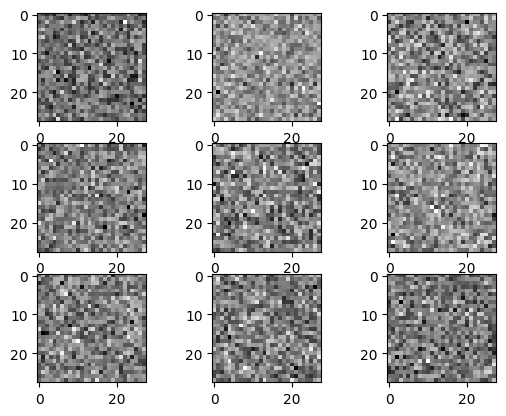

In [154]:
image_noise = noise.numpy().reshape(9, 28, 28)
plot_mnist_data(image_noise + 255)

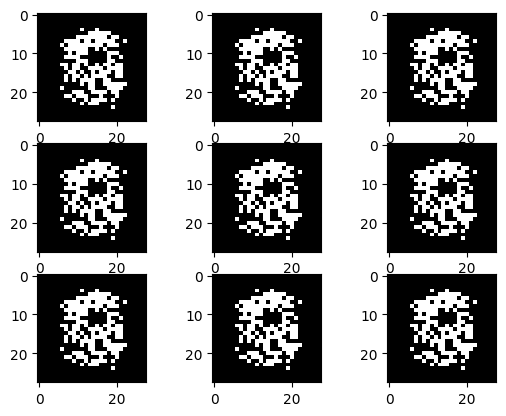

In [155]:
gan_g_output = gan_model.generator(noise)
gan_g_reshaped = gan_g_output.numpy().reshape(9, 28, 28)
plot_mnist_data(gan_g_reshaped + 255)

In [156]:
gan_model.discriminator(gan_g_output)

<tf.Tensor: shape=(9, 1), dtype=float32, numpy=
array([[3.2725875e-08],
       [3.2725875e-08],
       [3.2725875e-08],
       [3.2725875e-08],
       [3.2725875e-08],
       [3.2725875e-08],
       [3.2725875e-08],
       [3.2725875e-08],
       [3.2725875e-08]], dtype=float32)>